Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from glob import glob

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

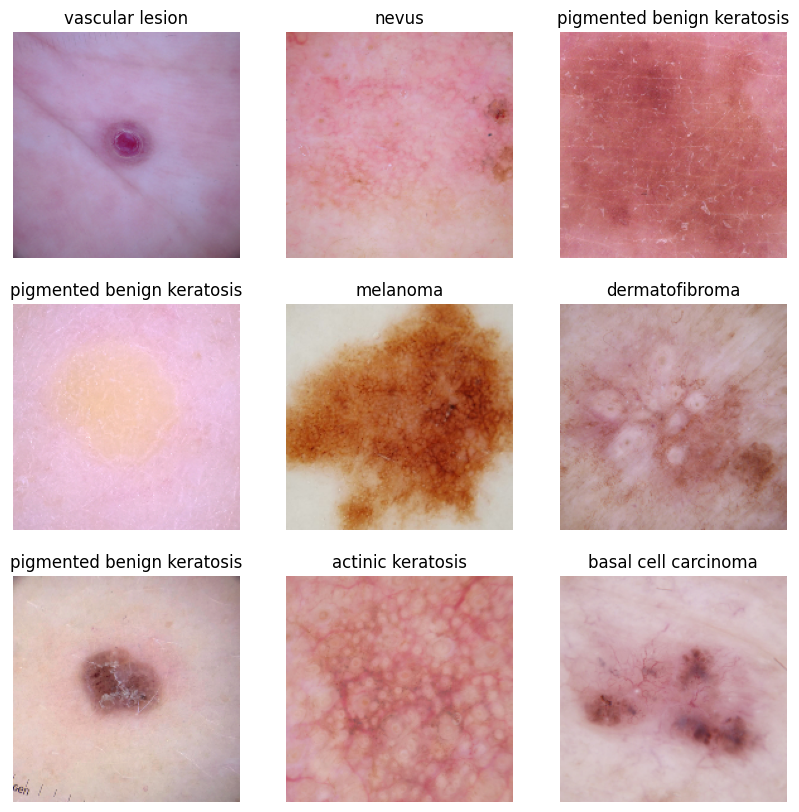

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

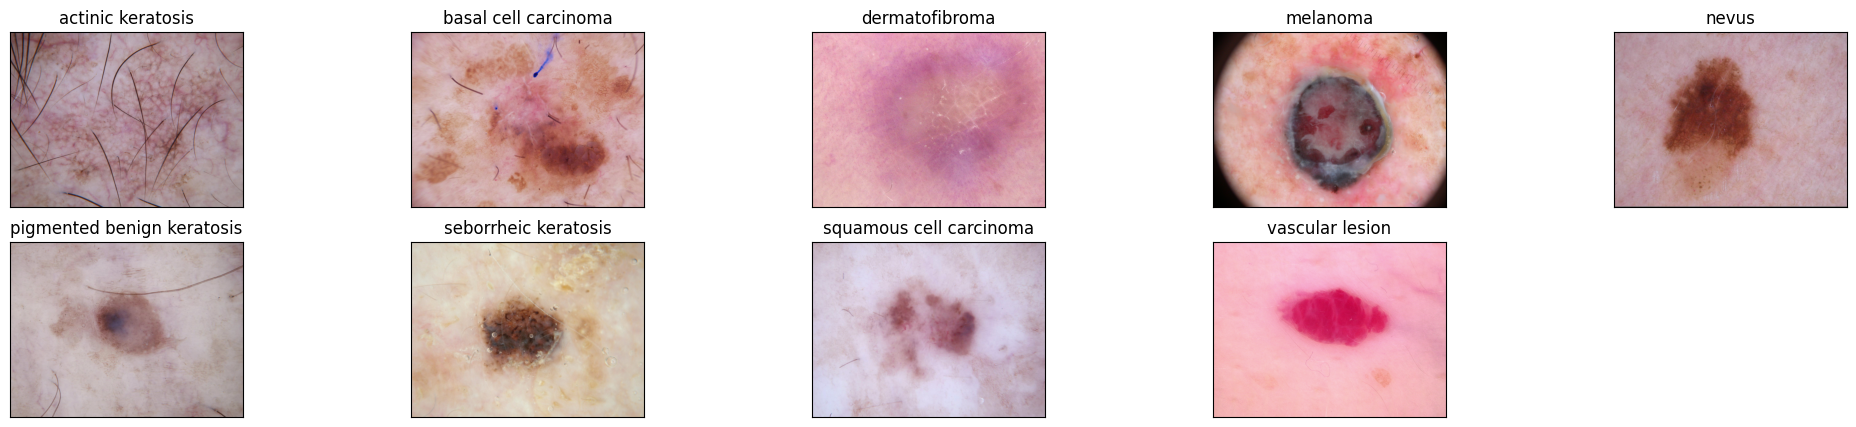

In [10]:
num_classes = len(class_names)

fig = plt.figure(figsize=(25,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    im = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

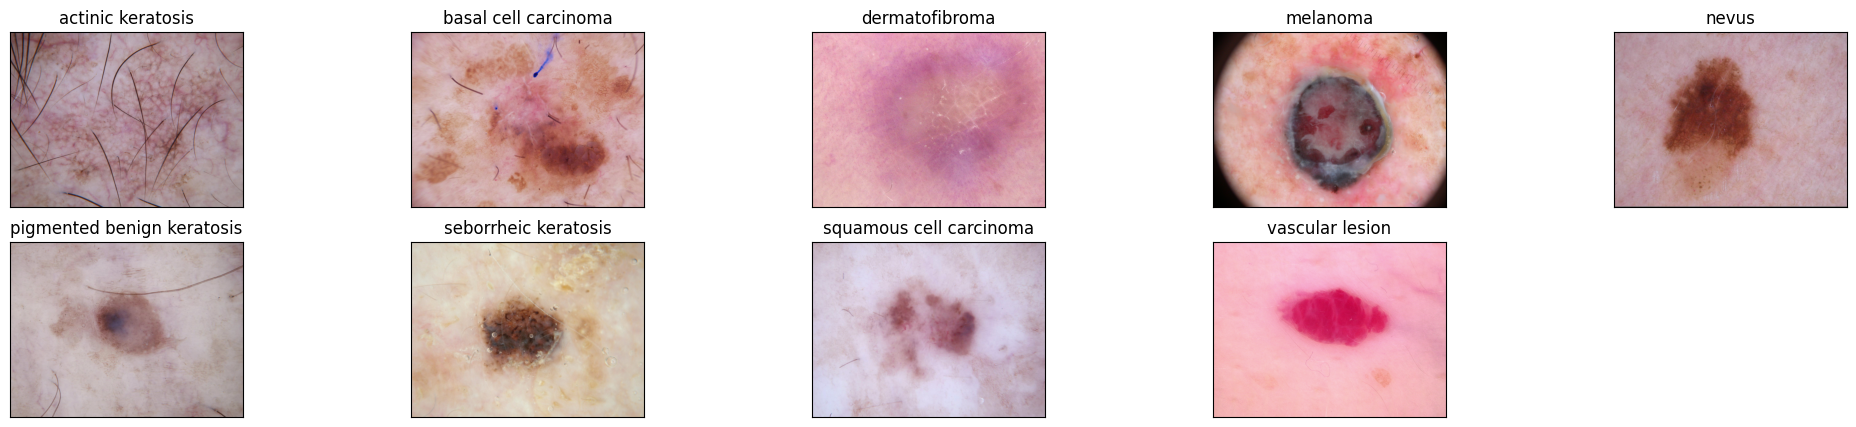

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
num_classes = len(class_names)

fig = plt.figure(figsize=(25,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    im = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
model = Sequential([layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', input_shape = (180, 180, 32)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dense(512,kernel_regularizer=l2(0.01)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 176, 176, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 176, 176, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 88, 88, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 86, 86, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 86, 86, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 43, 43, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 41, 41, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │         230,409 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 332,393 (1.27 MB)

 Trainable params: 332,393 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

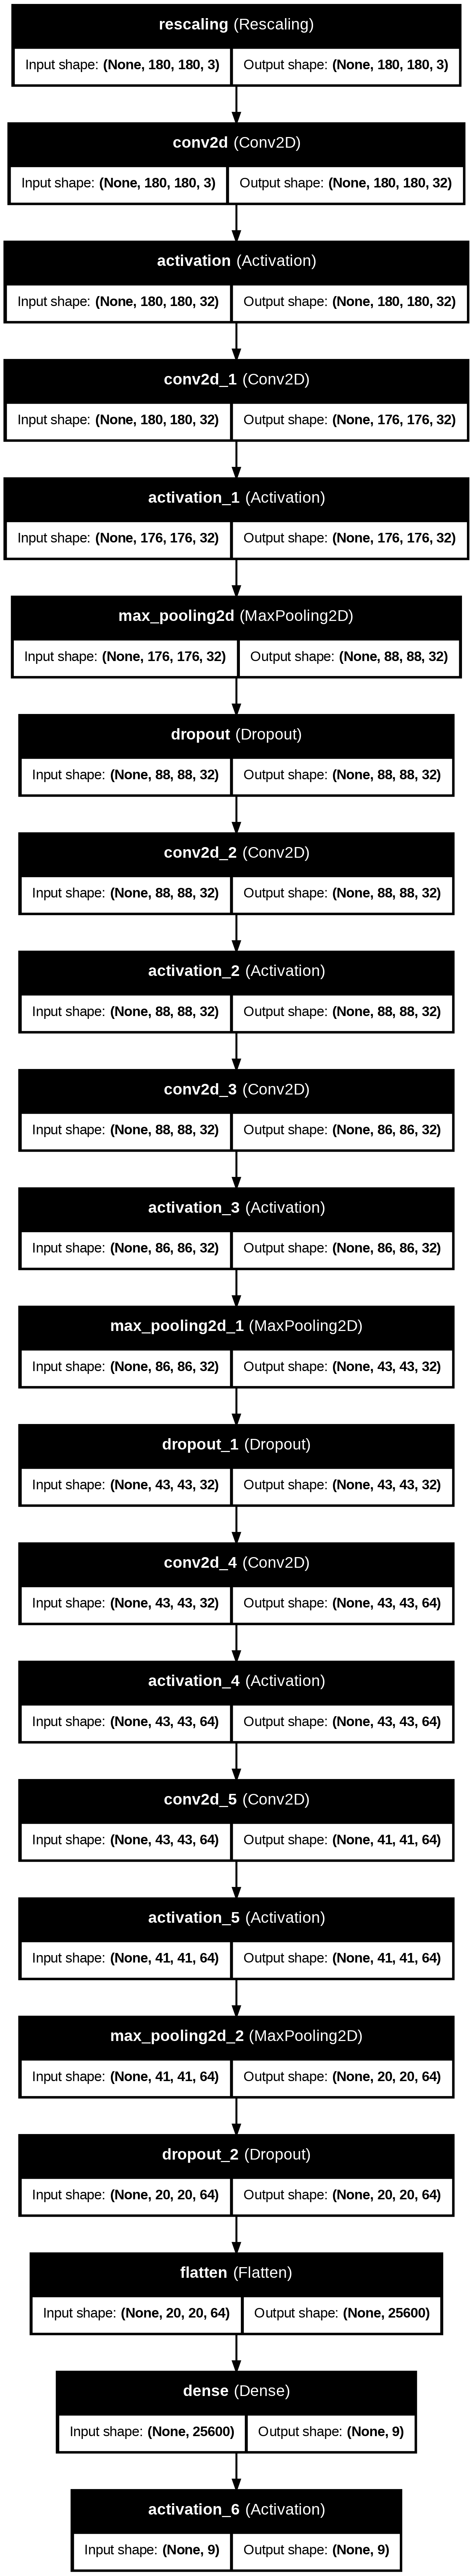

In [16]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 770s 4s/step - accuracy: 0.1749 - loss: 2.1161 - val_accuracy: 0.2058 - val_loss: 2.0338
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.2039 - loss: 2.0127 - val_accuracy: 0.3087 - val_loss: 1.8886
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.2704 - loss: 1.9635 - val_accuracy: 0.2617 - val_loss: 1.8914
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.2642 - loss: 1.8688 - val_accuracy: 0.2461 - val_loss: 1.9754
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.2971 - loss: 1.8258 - val_accuracy: 0.3289 - val_loss: 1.7689
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3641 - loss: 1.7154 - val_accuracy: 0.3557 - val_loss: 1.7130
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.4045 - loss: 1.6288 - val_accuracy: 0.4251 - val_loss: 1.6160
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.4188 - loss: 1.5863 - val_accuracy: 0.3781 - v

### Visualizing training results

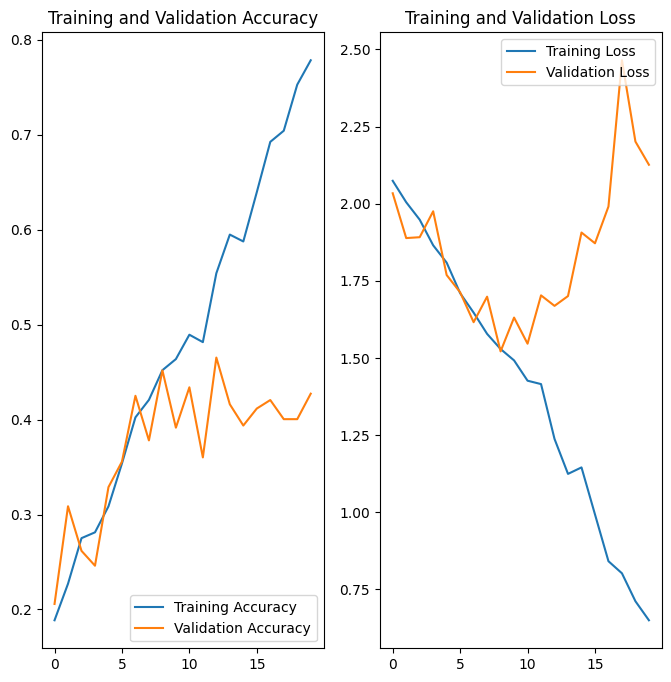

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8361 - loss: 0.5542
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4314 - loss: 2.0233
Accuracy 0.8376116156578064
loss 0.5410921573638916
val_accuracy 0.427293062210083
val_loss 2.12626314163208


#### Observation

There's a significant difference between the train and validation accuracy. Since the model performed really well with train data but not so well with validation data, this is clearly an overfit model.

To address this issue, augmentation techniques will be employed.

In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
  layers.RandomRotation(0.2,fill_mode='reflect'),
  layers.RandomContrast(0.5, seed=None),
  layers.RandomZoom((0.2, 0.3),width_factor=(0.2, 0.3), fill_mode='reflect')
])

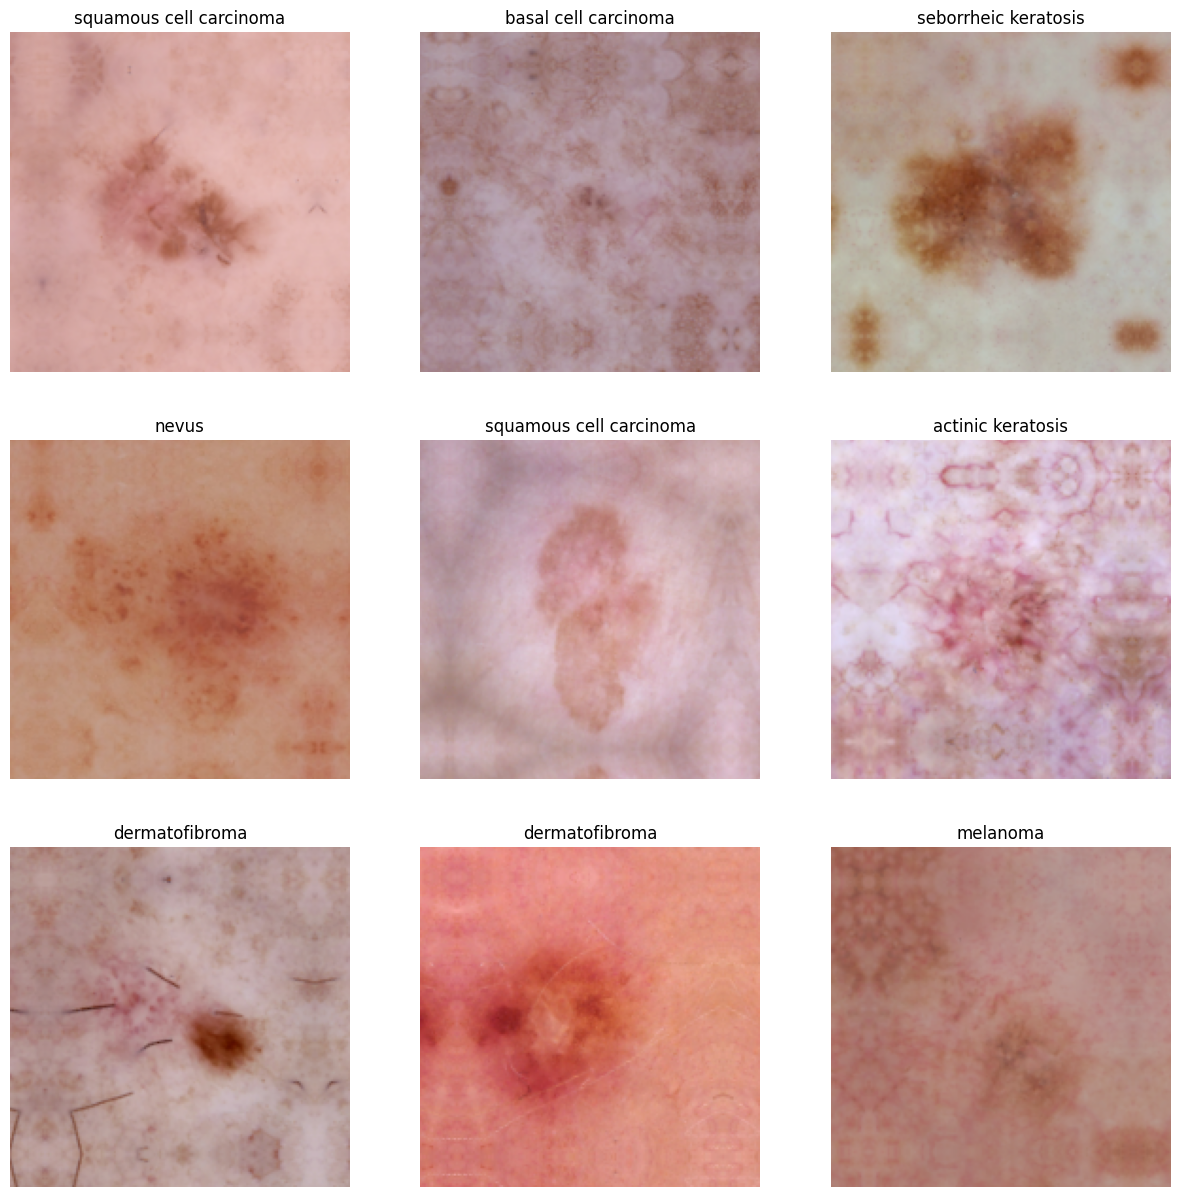

In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Todo:
Create the model, compile and train the model

In [22]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Todo:
### Create the model, compile and train the model

model = Sequential([data_augmentation,layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', input_shape = (180, 180, 32)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dense(512,kernel_regularizer=l2(0.01)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))



### Compiling the model

In [23]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.1690 - loss: 2.1109 - val_accuracy: 0.1946 - val_loss: 2.0433
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.2329 - loss: 2.0029 - val_accuracy: 0.2685 - val_loss: 1.9618
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.2944 - loss: 1.8638 - val_accuracy: 0.3691 - val_loss: 1.7099
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.3853 - loss: 1.6579 - val_accuracy: 0.4228 - val_loss: 1.6605
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.3979 - loss: 1.6388 - val_accuracy: 0.4832 - val_loss: 1.4811
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.4490 - loss: 1.5521 - val_accuracy: 0.4541 - val_loss: 1.5423
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.4396 - loss: 1.5507 - val_accuracy: 0.4094 - val_loss: 1.6493
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.4309 - loss: 1.5983 - val_accurac

### Visualizing the results

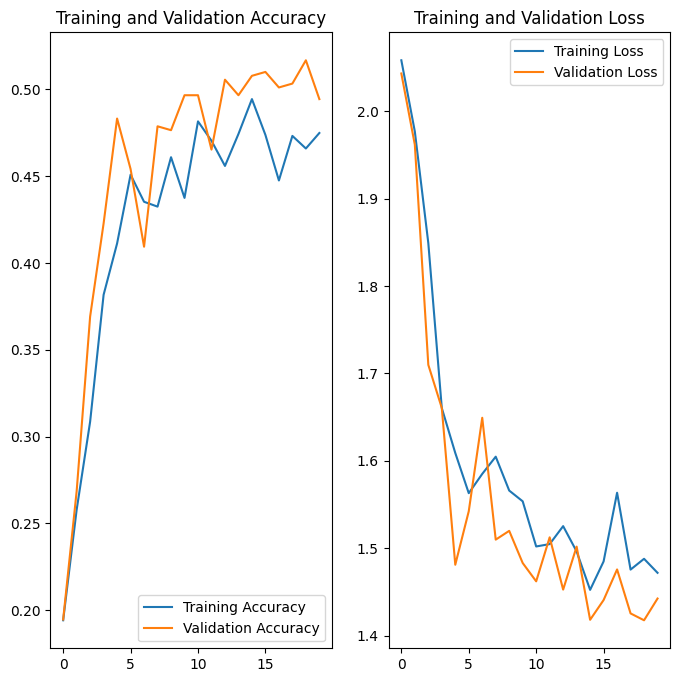

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4793 - loss: 1.4360
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5405 - loss: 1.3792
Accuracy 0.4815848171710968
loss 1.4270228147506714
val_accuracy 0.49440714716911316
val_loss 1.4424598217010498


Observation:
*   There is some reduction in the accuracy
*   Data augentation has solved the problem of overfitting
Accuracy has reduced which can be increased by increasing number of epochs.

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
path_list=[]
lesion_list=[]
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
df_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])
original_df

Path              Label
0     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
1     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
2     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
3     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
4     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
...                                                 ...                ...
2234  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion
2235  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion
2236  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion
2237  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion
2238  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion

[2239 rows x 2 columns]

<BarContainer object of 9 artists>

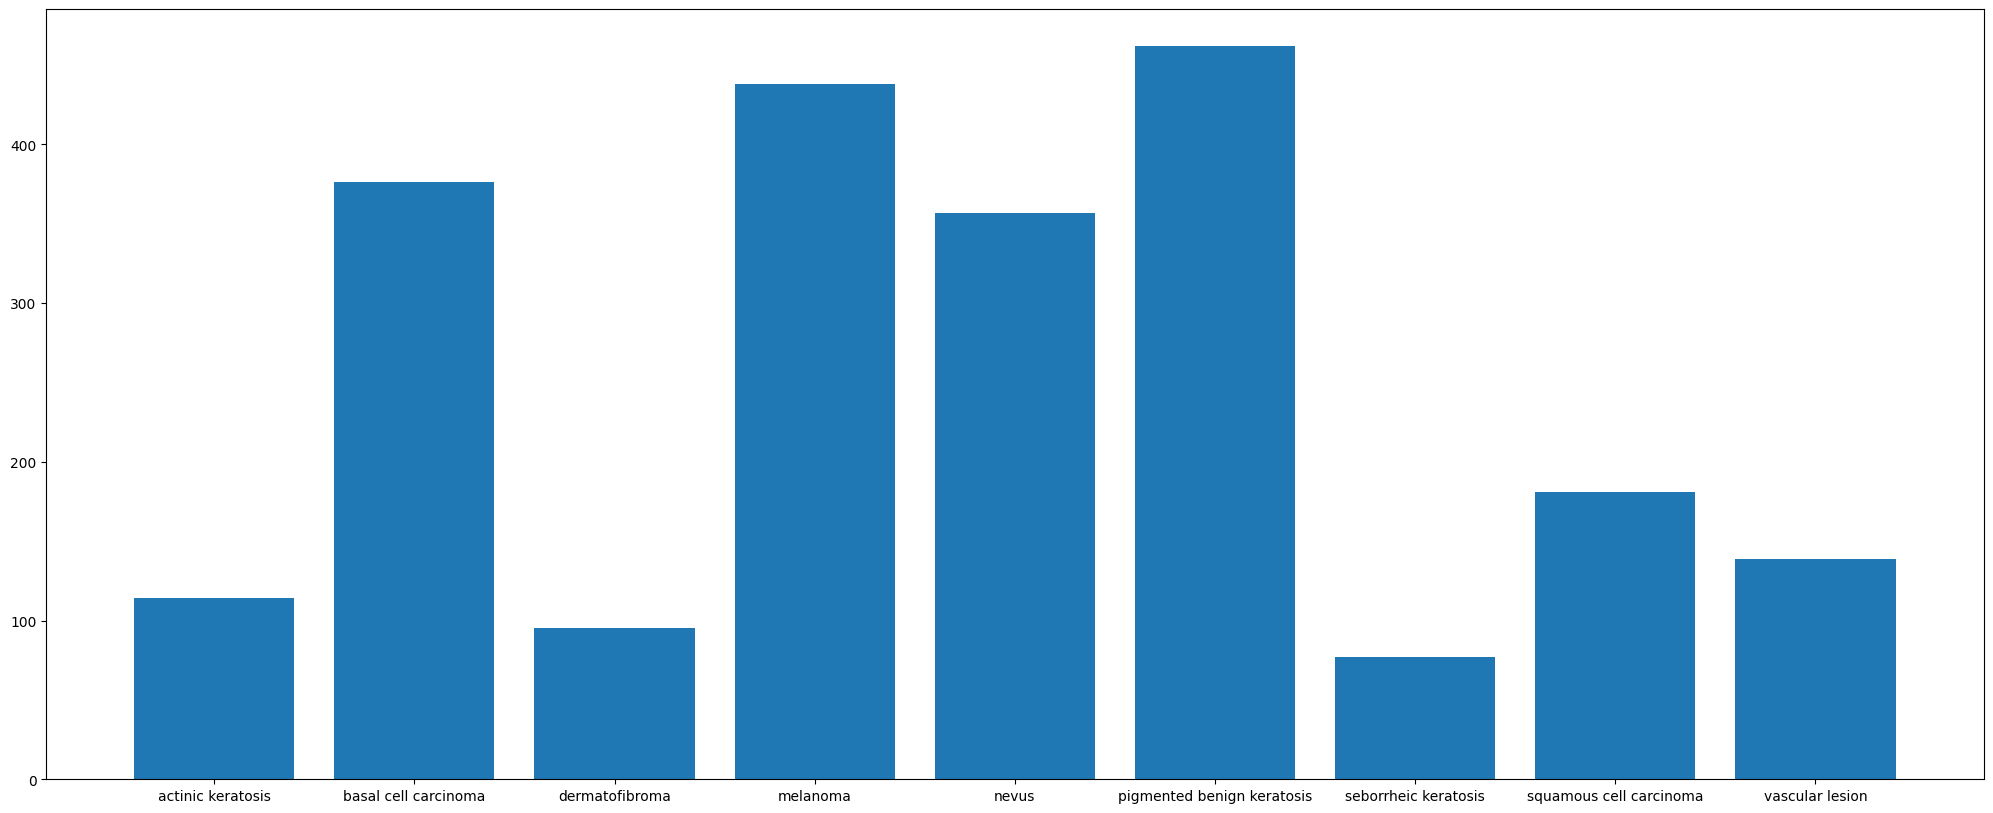

In [28]:
## Your code goes here.
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
-Seborrheic Keratosis has the least number of samples.

#### - Which classes dominate the data in terms proportionate number of samples?
-Melanoma and Pigmented benign keratosis classes dominate the data.
Actinic keratosis and Dermatofibroma have proportionate number of classes.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [31]:
path_to_training_dataset=pathlib.Path(root_path + '/Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset, save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD7809F7BB0>: 100%|██████████| 500/500 [00:46<00:00, 10.77 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD7F6BF2560>: 100%|██████████| 500/500 [00:37<00:00, 13.47 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD7D022AE90>: 100%|██████████| 500/500 [00:44<00:00, 11.14 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD7DEFE2140>: 100%|██████████| 500/500 [00:47<00:00, 10.60 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=722x542 at 0x7FD78D3A8D00>: 100%|██████████| 500/500 [00:50<00:00,  9.96 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD783D031F0>: 100%|██████████| 500/500 [00:45<00:00, 10.98 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD783D7E620>: 100%|██████████| 500/500 [00:45<00:00, 10.97 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FD78D3A8790>: 100%|██████████| 500/500 [00:39<00:00, 12.78 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2117x1988 at 0x7FD7D01BBCD0>: 100%|██████████| 500/500 [00:45<00:00, 11.02 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [32]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
#image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
#print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])
new_df

Path              Label
0     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
1     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
2     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
3     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
4     /content/gdrive/MyDrive/CNN_Assignment/Skin ca...  actinic keratosis
...                                                 ...                ...
2234  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion
2235  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion
2236  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion
2237  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion
2238  /content/gdrive/MyDrive/CNN_Assignment/Skin ca...    vascular lesion

[2239 rows x 2 columns]

In [36]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [37]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

[]

In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

[]

In [39]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

NameError: name 'path_list_new' is not defined

In [40]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

NameError: name 'dataframe_dict_new' is not defined

In [41]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [44]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_dir_train="/content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [49]:
## your code goes here
model = Sequential([data_augmentation,layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', input_shape = (180, 180, 32)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(124, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(124, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dense(512,kernel_regularizer=l2(0.01)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [50]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


#### **Todo:**  Train your model

In [51]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 37s 265ms/step - accuracy: 0.3007 - loss: 3.7791 - val_accuracy: 0.0878 - val_loss: 3.9245
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 257ms/step - accuracy: 0.4129 - loss: 2.3842 - val_accuracy: 0.1289 - val_loss: 2.9320
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 246ms/step - accuracy: 0.4103 - loss: 2.4650 - val_accuracy: 0.1789 - val_loss: 2.7523
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 256ms/step - accuracy: 0.4127 - loss: 2.4978 - val_accuracy: 0.3600 - val_loss: 2.6048
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.4499 - loss: 2.1262 - val_accuracy: 0.3433 - val_loss: 6.0021
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.4512 - loss: 2.1826 - val_accuracy: 0.1700 - val_loss: 18.3231
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 245ms/step - accuracy: 0.4499 - loss: 2.3492 - val_accuracy: 0.2344 - val_loss: 20.4455
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 246ms/step - accuracy: 0.5070 - loss:

#### **Todo:**  Visualize the model results

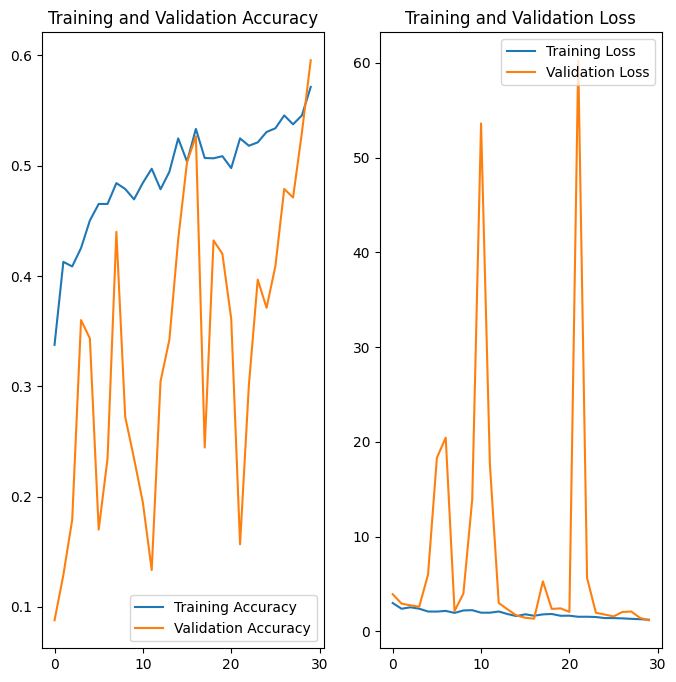

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [53]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.5972 - loss: 1.1380
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.6125 - loss: 1.1601
Accuracy 0.6058333516120911
loss 1.1111609935760498
val_accuracy 0.5955555438995361
val_loss 1.1735960245132446


Accuracy on training data has increased by using Augmentor library

The Model can be further improved by tuning the hyperparameter